<a href="https://colab.research.google.com/github/kmayutrisna/Federated-Learning/blob/main/FL_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Statement


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils import shuffle
from google.colab import drive

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
features = []
with open("/content/drive/My Drive/data/HumanActivity/data/train.csv") as file:
    for line in file:
        features.append(line.split()[0])

In [4]:
import csv
HEADERS = next(csv.reader(open('/content/drive/My Drive/data/HumanActivity/data/train.csv')))
print (HEADERS)

['subject', 'acc1_x', 'acc1_y', 'acc1_z', 'gyro1_x', 'gyro1_y', 'gyro1_z', 'acc2_x', 'acc2_y', 'acc2_z', 'label']


In [5]:
train_df = pd.read_csv('/content/drive/My Drive/data/HumanActivity/data/train.csv')
train_df['activity'] = train_df['label'].map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})


In [6]:
train_df.head()

,subject,acc1_x,acc1_y,acc1_z,gyro1_x,gyro1_y,gyro1_z,acc2_x,acc2_y,acc2_z,label,activity
0,3,-0.049573,0.051482,0.061498,0.357428,0.876525,-1.077288,0.951736,-0.303094,-0.133766,5,STANDING
1,3,-0.085298,0.048648,0.083263,0.337020,0.840771,-1.329607,0.918129,-0.301953,-0.111281,5,STANDING
2,3,-0.046568,0.057793,0.114970,0.320000,0.909147,-0.788201,0.958863,-0.288855,-0.078756,5,STANDING
3,3,0.001564,0.068723,0.144465,0.308596,0.773221,-0.313850,1.008886,-0.274002,-0.048346,5,STANDING
4,3,-0.026644,0.088834,0.188589,0.308176,0.691534,-0.457948,0.982454,-0.250003,-0.003217,5,STANDING


In [7]:
HEADERS = next(csv.reader(open('/content/drive/My Drive/data/HumanActivity/data/test.csv')))
print (HEADERS)

['subject', 'acc1_x', 'acc1_y', 'acc1_z', 'gyro1_x', 'gyro1_y', 'gyro1_z', 'acc2_x', 'acc2_y', 'acc2_z', 'label']


In [8]:
test_df = pd.read_csv('/content/drive/My Drive/data/HumanActivity/data/test.csv')
test_df['activity'] = test_df['label'].map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})

In [9]:
test_df.head()

,subject,acc1_x,acc1_y,acc1_z,gyro1_x,gyro1_y,gyro1_z,acc2_x,acc2_y,acc2_z,label,activity
0,2,0.011653,-0.029399,0.106826,0.437464,0.531349,0.136528,1.041216,-0.269796,0.023780,5,STANDING
1,2,0.013109,-0.039729,0.152455,0.468264,0.721069,0.097622,1.041803,-0.280025,0.076293,5,STANDING
2,2,0.011269,-0.052406,0.216846,0.498257,0.520328,0.083556,1.039086,-0.292663,0.147475,5,STANDING
3,2,0.027831,-0.052106,0.202581,0.479396,0.372625,0.022861,1.054768,-0.292384,0.139906,5,STANDING
4,2,0.002318,-0.045470,0.176010,0.389894,0.414541,-0.025939,1.028376,-0.285826,0.119934,5,STANDING


In [10]:
# Checking for nan values
print("Number of NaN values in train data is "+str(train_df.isnull().sum().sum()))
print("Number of NaN values in test data is "+str(test_df.isnull().sum().sum()))

Number of NaN values in train data is 0
Number of NaN values in test data is 0


In [11]:
# Checking for duplicate values
print("Number of duplicate values in train data is "+str(sum(train_df.duplicated())))
print("Number of duplicate values in test data is "+str(sum(test_df.duplicated())))

Number of duplicate values in train data is 213249
Number of duplicate values in test data is 120832


In [12]:
columns = train_df.columns

In [17]:
columns = columns.str.replace("[()]", '') 
columns = columns.str.replace("_", '')
columns = columns.str.replace(",", '')
#here, columns is of type pandas index. By writing "columns.str" we have changed its type to 
#pandas string. Pandas string has method called replace which we have used here.
train_df.columns = columns
test_df.columns = columns

In [13]:
train_df.columns

Index(['subject', 'acc1_x', 'acc1_y', 'acc1_z', 'gyro1_x', 'gyro1_y',
       'gyro1_z', 'acc2_x', 'acc2_y', 'acc2_z', 'label', 'activity'],
      dtype='object')

In [14]:
train_df.head()

,subject,acc1_x,acc1_y,acc1_z,gyro1_x,gyro1_y,gyro1_z,acc2_x,acc2_y,acc2_z,label,activity
0,3,-0.049573,0.051482,0.061498,0.357428,0.876525,-1.077288,0.951736,-0.303094,-0.133766,5,STANDING
1,3,-0.085298,0.048648,0.083263,0.337020,0.840771,-1.329607,0.918129,-0.301953,-0.111281,5,STANDING
2,3,-0.046568,0.057793,0.114970,0.320000,0.909147,-0.788201,0.958863,-0.288855,-0.078756,5,STANDING
3,3,0.001564,0.068723,0.144465,0.308596,0.773221,-0.313850,1.008886,-0.274002,-0.048346,5,STANDING
4,3,-0.026644,0.088834,0.188589,0.308176,0.691534,-0.457948,0.982454,-0.250003,-0.003217,5,STANDING


In [15]:
test_df.head()

,subject,acc1_x,acc1_y,acc1_z,gyro1_x,gyro1_y,gyro1_z,acc2_x,acc2_y,acc2_z,label,activity
0,2,0.011653,-0.029399,0.106826,0.437464,0.531349,0.136528,1.041216,-0.269796,0.023780,5,STANDING
1,2,0.013109,-0.039729,0.152455,0.468264,0.721069,0.097622,1.041803,-0.280025,0.076293,5,STANDING
2,2,0.011269,-0.052406,0.216846,0.498257,0.520328,0.083556,1.039086,-0.292663,0.147475,5,STANDING
3,2,0.027831,-0.052106,0.202581,0.479396,0.372625,0.022861,1.054768,-0.292384,0.139906,5,STANDING
4,2,0.002318,-0.045470,0.176010,0.389894,0.414541,-0.025939,1.028376,-0.285826,0.119934,5,STANDING


In [16]:
x_train = train_df.drop(["subject", "label", "activity"], axis = 1)
y_train = train_df["label"]

x_test = test_df.drop(["subject", "label", "activity"], axis = 1)
y_test = test_df["label"]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((528256, 9), (528256,), (263424, 9), (263424,))

In [17]:
y_train=y_train-1;
y_test=y_test-1;
x1=x_train[0:264128];
x2=x_train[264128:528256];
y1=y_train[0:264128];
y2=y_train[264128:528256];
y1.shape

(264128,)

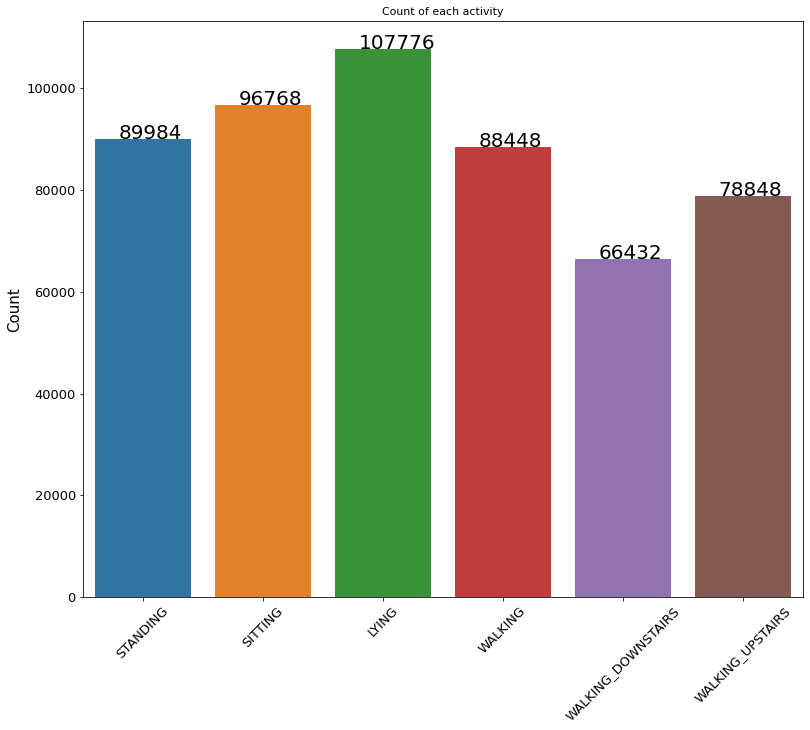

In [18]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each activity", fontsize = 11)
plt.tick_params(labelsize = 10)
sns.countplot(x='activity' , data = train_df)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2 , y = i.get_height() + 10, s = str(i.get_height()), fontsize=20)
plt.xlabel('')
plt.ylabel('Count',fontsize =15)
plt.tick_params(labelsize = 13)
plt.xticks(rotation = 45)
plt.show()

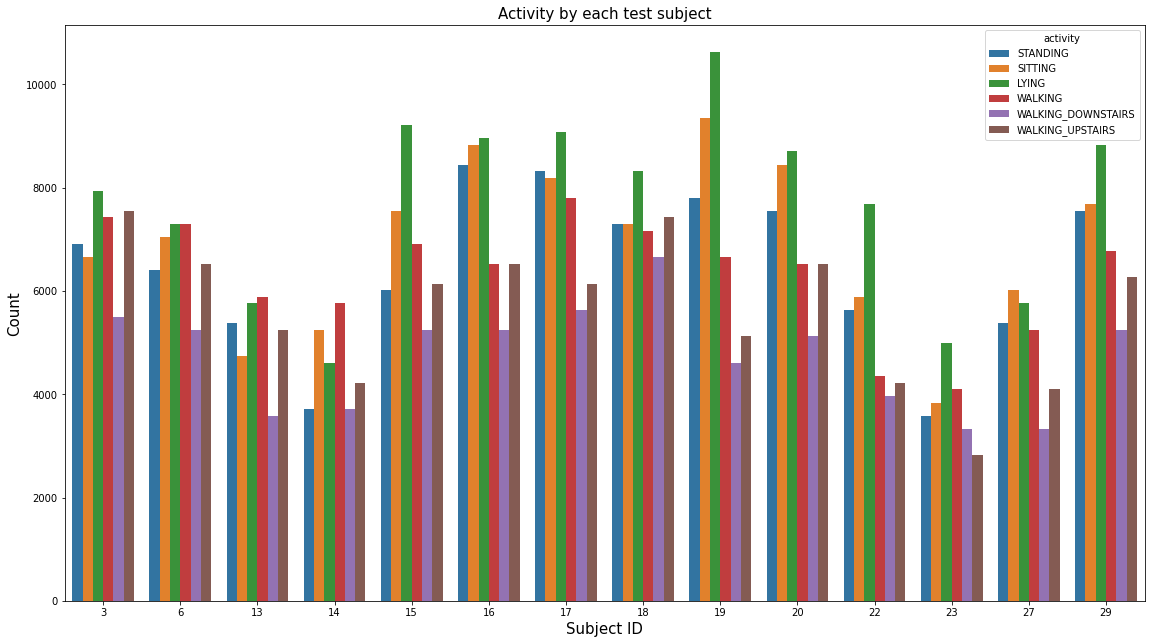

In [19]:
fig = plt.figure(figsize = (15, 8))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Activity by each test subject", fontsize = 15)
plt.tick_params(labelsize = 10)
sns.countplot(x = 'subject', hue = "activity", data = train_df)
plt.xlabel("Subject ID", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

In [20]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
#from keras.optimizers import SGD



model1 = tf.keras.Sequential([                          
    #tf.reshape(data, [561, 1])
    tf.keras.layers.Flatten(input_shape=(9, 1)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model1.fit(x1,y1,epochs=10)
#model1.fit(x1, y1, epochs=10)

#W12=[];
#for ln,l in enumerate(model1.layers):
 #   w=(l.get_weights());
  #  if(len(w)>0):
       #W12.append(w[0]);

W12=model1.get_weights();
W1=np.array(W12);

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


8254/8254 [==============================] - 23s 3ms/step - loss: 0.2586 - accuracy: 0.8968
Epoch 2/10
8254/8254 [==============================] - 22s 3ms/step - loss: 0.1457 - accuracy: 0.9434
Epoch 3/10
8254/8254 [==============================] - 22s 3ms/step - loss: 0.1208 - accuracy: 0.9539
Epoch 4/10
8254/8254 [==============================] - 21s 3ms/step - loss: 0.1039 - accuracy: 0.9613
Epoch 5/10
8254/8254 [==============================] - 22s 3ms/step - loss: 0.0928 - accuracy: 0.9656
Epoch 6/10
8254/8254 [==============================] - 22s 3ms/step - loss: 0.0849 - accuracy: 0.9688
Epoch 7/10
8254/8254 [==============================] - 22s 3ms/step - loss: 0.0784 - accuracy: 0.9710
Epoch 8/10
8254/8254 [==============================] - 22s 3ms/step - loss: 0.0721 - accuracy: 0.9736
Epoch 9/10
8254/8254 [==============================] - 22s 3ms/step - loss: 0.0678 - accuracy: 0.9752
Epoch 10/10
8254/8254 [==============================] - 22s 3ms/step - loss: 0.0641

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [21]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(9, 1)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model2.fit(x2, y2, epochs=10)


W12=model2.get_weights();
W2=np.array(W12);

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


8254/8254 [==============================] - 23s 3ms/step - loss: 0.2916 - accuracy: 0.8780
Epoch 2/10
8254/8254 [==============================] - 21s 3ms/step - loss: 0.1763 - accuracy: 0.9314
Epoch 3/10
8254/8254 [==============================] - 21s 3ms/step - loss: 0.1329 - accuracy: 0.9502
Epoch 4/10
8254/8254 [==============================] - 23s 3ms/step - loss: 0.1094 - accuracy: 0.9599
Epoch 5/10
8254/8254 [==============================] - 21s 3ms/step - loss: 0.0928 - accuracy: 0.9662
Epoch 6/10
8254/8254 [==============================] - 20s 2ms/step - loss: 0.0827 - accuracy: 0.9700
Epoch 7/10
8254/8254 [==============================] - 20s 2ms/step - loss: 0.0745 - accuracy: 0.9728
Epoch 8/10
8254/8254 [==============================] - 21s 3ms/step - loss: 0.0680 - accuracy: 0.9752
Epoch 9/10
8254/8254 [==============================] - 20s 2ms/step - loss: 0.0634 - accuracy: 0.9769
Epoch 10/10
8254/8254 [==============================] - 20s 2ms/step - loss: 0.0591

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [22]:
W=(W1+W2)/2.0;
print(W1.shape,'\n')
print(W2.shape,'\n')
print(W.shape,'\n')

(10,) 

(10,) 

(10,) 



In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(9, 1)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.set_weights(W)

In [24]:
res=model.evaluate(x_test,y_test, verbose=1);

   1/8232 [..............................] - ETA: 37:35 - loss: 2.4653 - accuracy: 0.0000e+00

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


8232/8232 [==============================] - 11s 1ms/step - loss: 8.0724 - accuracy: 0.1548
